In [1]:
import advertools as adv
import pandas as pd
import numpy as np
import tqdm
import matplotlib.pyplot as plt

In [2]:
migrant = pd.read_csv("Migrant/migrant_1800.csv")
migrant.drop(migrant.columns[0],inplace=True,axis=1)
migrant

,word,year,count,language,Rank
0,aa,1801,96,italian,4084.0
1,aa,1801,598,spanish,4473.0
2,aa,1807,4849,french,2994.0
3,aa,1942,3169,german,4923.0
4,abandon,1800,3124,english,3156.0
...,...,...,...,...,...
14351,états,1810,528,italian,2840.0
14352,étoit,1800,151690,french,8.0
14353,étoit,1816,475,german,4194.0
14354,étranger,1800,12974,french,788.0


In [4]:
def migrants(language_out,language_in,years,exclude=""):
    migrant_df = pd.read_csv("Migrant/migrant_1800.csv")
    migrant_df.drop(migrant_df.columns[0],inplace=True,axis=1)
    
    #Take only the first appearances of words
    first_appearance = migrant_df.drop_duplicates(subset='word', keep='first')
    
    #take the words created by the out language.
    out_words = first_appearance[first_appearance["language"] == language_out ]
    
    #Take the words that
    migrated_from_out = migrant_df[(migrant_df["word"].isin(out_words["word"])) & 
                               (migrant_df["year"].isin(years)) &
                                (migrant_df["language"] == language_in)
                               ]
    return(migrated_from_out)

migrants("italian","spanish",range(1850,2008),"")

,word,year,count,language,Rank
174,adolfo,1864,3605,spanish,3979.0
238,agr,1951,10406,spanish,4983.0
240,agraria,1919,5606,spanish,4221.0
242,agrario,1914,4420,spanish,4732.0
253,agro,1978,26316,spanish,4794.0
...,...,...,...,...,...
13902,villani,1854,1702,spanish,4780.0
13985,vitamina,1940,12760,spanish,3383.0
14059,vota,1882,2848,spanish,4451.0
14290,yndias,1871,2720,spanish,3744.0


In [5]:
def uset(language_out,language_in,year,years_acc,exclude):
    
    words = migrants(language_out,language_in,years_acc,exclude)["word"]
    
    lan_in_df = pd.read_csv("Top5000/"+"top_"+language_in + exclude+ ".csv",dtype={"0":str, "1":np.int32, "2":np.int32},
                         names = ["word","year","count"], header=None,index_col=False)
    
    lan_in_df['Rank'] = lan_in_df.groupby("year")["count"].rank(ascending=False, method='first')
    lan_in_df = lan_in_df.sort_values(by=["year", "Rank"])
    
    
    lan_in_year = lan_in_df[lan_in_df["year"]==year]
    
    normalization = np.sum(lan_in_year["count"])

    words_year = lan_in_year[lan_in_year["word"].isin(words)]
    
    
    frec = np.sum(words_year["count"])
#     print(frec/normalization)

#     return(words_year)
#     return(words_year,frec/normalization)
    return(words_year["word"].values, frec/normalization)

def use(language_out,language_in,years,exclude):
    words = []
    uses = []
    for year in tqdm.tqdm(years):
        a,b = uset(language_out,language_in,year,years,exclude)
        words.append(list(a))
        uses.append(b)
    return(words,uses)

In [96]:
words,uses = use("english","french",range(1850,2008+1),"_exc_all")

100%|████████████████████████████████████████████████████████████████████████████████| 159/159 [02:46<00:00,  1.05s/it]


In [23]:
words,uses = use("spanish","german",range(1900,2008),"_exc_all")

100%|████████████████████████████████████████████████████████████████████████████████| 108/108 [01:57<00:00,  1.09s/it]


In [97]:
words

[['intellect', 'corporation', 'solutions', 'marlborough', 'intense'],
 ['monk', 'gray'],
 ['foix', 'circuit', 'corporation', 'permanent'],
 ['intense', 'filaments'],
 ['circuit'],
 ['chili', 'patronage'],
 ['circuit', 'shakspeare', 'peel', 'shall', 'commercial', 'monk'],
 ['mill', 'commercial'],
 ['circuit', 'international'],
 ['circuit', 'intense'],
 ['permanent', 'circuit', 'martyrs'],
 ['eminence', 'arch', 'commercial', 'cloud', 'martyrs'],
 ['russell', 'cloud', 'commercial', 'arch'],
 ['arch', 'russell', 'cloud'],
 ['silex', 'progressive', 'russell', 'solutions', 'permanent'],
 ['russell', 'silex', 'solutions', 'correspondent', 'martyrs'],
 ['martyrs',
  'intense',
  'correspondent',
  'infection',
  'solutions',
  'progressive'],
 ['silex', 'intense', 'solutions', 'permanent', 'commercial'],
 ['trains',
  'wagons',
  'intense',
  'silex',
  'international',
  'solutions',
  'progressive'],
 ['intense', 'silex', 'correspondent', 'solutions', 'international'],
 ['silex',
  'internat

In [72]:
words

[['plantations',
  'colonial',
  'op',
  'boers',
  'expansion',
  'doses',
  'suggestion',
  'gain',
  'arthur',
  'pin',
  'age',
  'plate',
  'phrases',
  'dollars'],
 ['op',
  'colonial',
  'expansion',
  'doses',
  'dollars',
  'plantations',
  'suggestion',
  'gain',
  'london',
  'arthur',
  'index',
  'age',
  'marks',
  'formations'],
 ['colonial',
  'op',
  'expansion',
  'doses',
  'boers',
  'plantations',
  'dollars',
  'suggestion',
  'marks',
  'gain',
  'nice',
  'armature',
  'courts'],
 ['op',
  'dollars',
  'colonial',
  'expansion',
  'doses',
  'marks',
  'trust',
  'plantations',
  'suggestion'],
 ['op',
  'arthur',
  'dollars',
  'colonial',
  'doses',
  'expansion',
  'gain',
  'aspects',
  'james',
  'plantations'],
 ['op',
  'expansion',
  'colonial',
  'dollars',
  'arthur',
  'doses',
  'anglo',
  'gain',
  'aluminium',
  'marks',
  'location',
  'formations',
  'club'],
 ['op',
  'colonial',
  'expansion',
  'dollars',
  'doses',
  'plantations',
  'marks',

In [98]:
migrant[migrant["word"]=="adorno"]

,word,year,count,language,Rank
177,adorno,1800,904,spanish,3751.0
178,adorno,1812,234,italian,4725.0
179,adorno,1971,17249,german,4639.0


### Calculate uses of all pairs of langauges


In [99]:
languages = ["english","french","german","italian","spanish"]
exclude = "_exc_all"

for language_out in languages:
    for language_in in languages:
        if language_out == language_in:
            continue
        words, uses = use(language_out,language_in,range(1850,2009),exclude)
        
        with open("Fig3_data/" + language_out + "_" + language_in + "_exc_all_new_1800" + '.txt', 'w') as f:
            for year_words in words:
                for j,word in enumerate(year_words):
                    if j == len(year_words)-1:
                        f.write(word)
                    else:
                        f.write(word+",")
        
                f.write("\n")
            
            for i,value in enumerate(uses):
                if i == len(uses)-1:
                    f.write(str(value))
                else:
                    f.write(str(value)+",")
        

100%|████████████████████████████████████████████████████████████████████████████████| 159/159 [02:43<00:00,  1.03s/it]


## See the results

In [6]:



def read_words(language_out,language_in,exclude="_exc_all"):

    with open("Fig3_data/" + language_out + "_" + language_in + exclude + '_new_1800.txt', 'r') as f:
        lines = f.readlines()
    
        complete_list = [line.strip() for line in lines[:-1]]
    
        list_of_words = []
        for i in range(len(complete_list)):
            year_words = []
            
            for word in complete_list[i].split(","):
                year_words.append(word)
            
                list_of_words.append(year_words)
                
    return(list_of_words)

def read_uses(language_out,language_in,exclude="_exc_all"):
    with open("Fig3_data/" + language_out + "_" + language_in + exclude + '_new_1800.txt', 'r') as f:
        lines = f.readlines()
        
#         complete_list = [line.strip() for line in lines[-1]]
#         print(complete_list)
        lista = lines[-1].split(',')
        use = [float(a) for a in lista]
        
    return(use)

def use_of_word(word,year,language,exclude="_exc_all"):
    lan_in_df = pd.read_csv("Top5000/"+"top_"+language + exclude+ "_new_1800.csv",
                dtype={"0":str, "1":np.int32, "2":np.int32},
                names = ["word","year","count"],
                header=None,index_col=False)
    
    lan_in_year = lan_in_df[lan_in_df["year"]==year].copy()
    lan_in_year["Rank"]= lan_in_year["count"].rank(ascending=False, method='first')
    lan_in_year = lan_in_year.sort_values(by="Rank")
    
    normalization = np.sum(lan_in_year["count"])

    w = lan_in_year[lan_in_year["word"]==word]
    return(w)

english_spanish_w = read_words("english","spanish")
english_spanish_u = read_uses("english","spanish")


In [7]:
english_spanish_w = read_words("english","spanish","_exc_all")
english_spanish_w[-1]

['control',
 'sector',
 'university',
 'similar',
 'op',
 'internet',
 'miles',
 'john',
 'define',
 'web',
 'american',
 'hotel',
 'international',
 'paul',
 'cambridge',
 'musical',
 'world',
 'agenda',
 'marketing',
 'robert',
 'visual',
 'oxford',
 'ritual',
 'digital',
 'conceptual',
 'laura',
 'william',
 'george',
 'history',
 'james',
 'research',
 'richard',
 'medieval',
 'charles',
 'review',
 'development',
 'bar',
 'studies',
 'chicago',
 'peter',
 'nuclear',
 'national',
 'economic',
 'michael',
 'study',
 'society',
 'software',
 'informal',
 'human',
 'london',
 'genes',
 'management',
 'bush',
 'political',
 'roles',
 'law']

### Small test to see that the uses calculated are correct

Function to run queries of Google Ngram Viewer

In [146]:
import requests 
import urllib 
  
def runQuery(query, start_year,  
             end_year, corpus="es-2012", 
             smoothing=0,case_insensitive=True): 
  
    # converting a regular string to  
    # the standard URL format 
    # eg: "geeks for,geeks" will 
    # convert to "geeks%20for%2Cgeeks" 
    query = urllib.parse.quote(query) 
  

    # creating the URL 
    if case_insensitive == True:
        url = ('https://books.google.com/ngrams/json?content=' + query +
    '&year_start=' + str(start_year) + '&year_end=' +
    str(end_year) + '&corpus=' + str(corpus) + '&smoothing=' +
    str(smoothing) + "&case_insensitive=" + str(case_insensitive)+ '' )
  
    else:
        url = ('https://books.google.com/ngrams/json?content=' + query +
    '&year_start=' + str(start_year) + '&year_end=' +
    str(end_year) + '&corpus=' + str(corpus) + '&smoothing=' +
    str(smoothing) + '' )
        
    # requesting data from the above url 
    response = requests.get(url) 
  
    # extracting the json data from the response we got 
    output = response.json() 
  
    # creating a list to store the ngram data 
    return_data = [] 
  
    if len(output) == 0: 
        # if no data returned from site, 
        # print the following statement 
        return "No data available for this Ngram."
    else: 
        # if data returned from site, 
        # store the data in return_data list 
        for num in range(len(output)): 
            
              # getting the name 
            return_data.append((output[num]['ngram'],  
                                  
                                # getting ngram data 
                                output[num]['timeseries'])  
                               ) 
  
    return return_data 

runQuery("the",2000,2001,"es-2012",0,True)

[('the (All)', [0.0007015032746329752, 0.0006878203437837849]),
 ('the', [0.0005046764272265136, 0.00048433145275339484]),
 ('The', [0.00019017051090486348, 0.00019652048649732023]),
 ('THE', [6.64784965920262e-06, 6.957033292565029e-06]),
 ('THe', [4.243421170002648e-09, 4.873388803616763e-09]),
 ('tHe', [2.6521382867628063e-09, 2.7074382735747804e-09]),
 ('ThE', [5.30427646250331e-10, 3.2489257950629735e-09]),
 ('tHE', [1.060855292500662e-09, 5.414876325104956e-10])]

Get the counts of three words in 1999 with my results

In [147]:
high_m = use_of_word("high",1999,"english","")
seven_m = use_of_word("seven",1999,"english","")
operation_m = use_of_word("operation",1999,"english","")
operation_m

,word,year,count,Rank
1295784,operation,1999,1733122,785.0


And get them with the query

In [148]:
high = runQuery("high",1999,2000,"en-2012",0,True)[0][1][0]
seven = runQuery("seven",1999,2000,"en-2012",0,True)[0][1][0]
operation = runQuery("operation",1999,2000,"en-2012",0,True)[0][1][0]

In [150]:
print(high/seven, high_m["count"].values / seven_m["count"].values)
print(high/operation, high_m["count"].values / operation_m["count"].values)
print(seven/operation,seven_m["count"].values / operation_m["count"].values)

5.111869548964236 [5.11312183]
4.897319317511588 [4.89965738]
0.9580290088787339 [0.95825164]


In [11]:
migrant[migrant["word"]=="anemia"]

,word,year,count,Rank,language
1199,anemia,1745,364,215.0,spanish
1200,anemia,1929,3398,4923.0,italian


# Graphs

In [8]:
def graph(language_outs,language_ins,excludes,title,ylimit=None,legend=True,
         save = False):
    colors = {"english":"steelblue","french":"darkorange","german":"darkviolet",
         "italian":"green","spanish":"brown"}
    
    for i in range(len(language_outs)):
        language_out = language_outs[i]
        language_in = language_ins[i]
        exclude = excludes[i]
    

        uses = read_uses(language_out,language_in,exclude)
    
        plt.plot(range(1900,2008),uses,label = language_in,
                color = colors[language_in])

    if ylimit != None:
        plt.ylim([0,ylimit])
    else:
        plt.gca().set_ylim(bottom=0)

    
    if legend == True:
        plt.legend()
    plt.title(title,fontsize=16,y=1,pad=-20)
    plt.xlabel("Year",fontsize=14)    
    plt.ylabel("Use",fontsize=14)

   
    if save != False:
        plt.savefig('Fig3_data/'+ save +'.png',bbox_inches = "tight")

        
    plt.show()

    
    

In [9]:
read_uses("spanish","german","_exc_all")

[6.551672604717694e-05,
 8.873609053223907e-05,
 0.0,
 0.0,
 0.00014494537779634746,
 8.393974046522163e-05,
 0.0,
 0.0,
 0.00021917613999269023,
 0.0002427299844213632,
 0.00018887988080153604,
 0.0006720558130112654,
 0.0002383354554899071,
 0.00019579453717451402,
 0.00027681801222028323,
 0.00028889983253297264,
 0.00017512951993994895,
 7.771281211178298e-05,
 0.0001519209963157669,
 0.00021033864856269082,
 0.00011839981734089854,
 0.0002885340433739592,
 0.00013736322211549076,
 0.00039226386223368116,
 0.00024758299115574444,
 0.00045129525077950924,
 0.0002689605063729286,
 0.00031805408554395193,
 0.000554899170080808,
 0.0003198779246186283,
 0.0006085252996243922,
 0.00023912688973936984,
 0.00042418145918629005,
 0.0004853668686112847,
 0.00033531438791506565,
 0.0003348283426655355,
 0.00042213167596946786,
 0.00042039672311463546,
 0.00032195615651717073,
 0.0002498838445188282,
 0.00044392756569865035,
 0.00037758284868710795,
 0.00036986084419613684,
 0.000455206372725

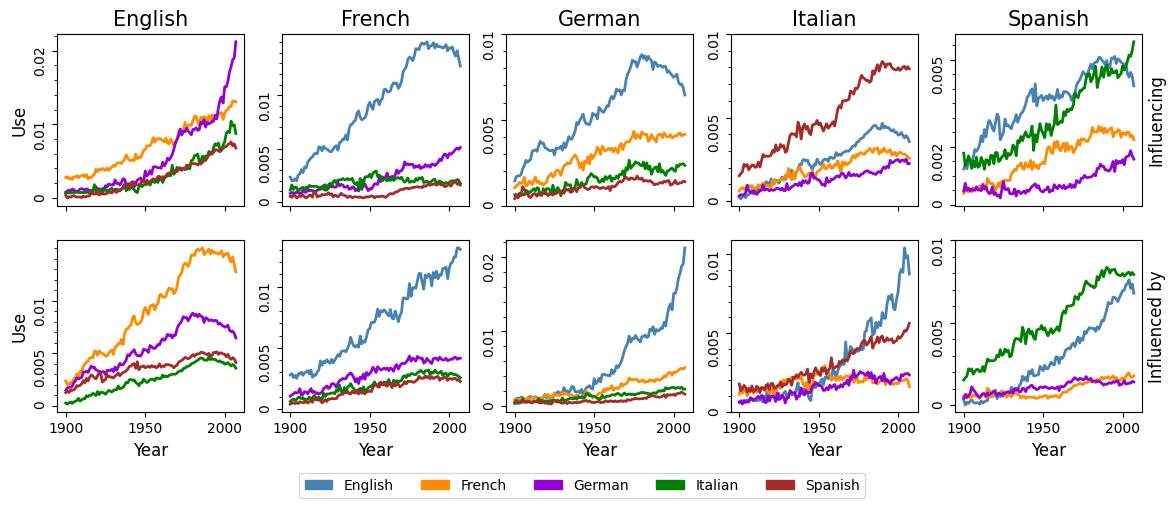

In [10]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

languages = ["english","french","german","italian","spanish"]
languagesM = ["English","French","German","Italian","Spanish"]
# exc = ["","_exc_all","_exc_none"]
colors = {"english":"steelblue","french":"darkorange","german":"darkviolet",
         "italian":"green","spanish":"brown"}
# exclude_title = ["Exclude each", "Exclude all", "Exclude none"]
ex = "_exc_all"

fig, axs = plt.subplots(2, 5, figsize=(14, 6), sharex=True)



for j,lan in enumerate(languages):
    
    for k,lan2 in enumerate(languages):
        if lan == lan2:
            continue
                
        lista0 = read_uses(lan,lan2,ex)
#         print(lan,lan2,lista0[-1])
    
        axs[0][j].plot(range(1900,2008),lista0[50:-1],
                        color= colors[lan2],linewidth=2)
        
#         lista1 = read_uses(lan2,lan,ex)
        axs[1][k].plot(range(1900,2008),lista0[50:-1],
                        color= colors[lan],linewidth=2)
    
        axs[0][k].ticklabel_format(axis="y",style="sci",scilimits = (0,0))  
        axs[1][k].ticklabel_format(axis="y",style="sci",scilimits= (0,0))  

#         if max(lista0)>max0j:
#             max0j = max(lista0)
            
#         if max(lista1)>max1j:
#             max1j = max(lista1)
            
         
    axs[0][0].set_ylabel(r"Use",fontsize=12)
    axs[1][0].set_ylabel(r"Use",fontsize=12)
    
#     max0j = max0j//0.005*0.005+0.005
#     max1j = max1j//0.005*0.005+0.005
    
#     ys0 = [0,np.around(max0j,3)]
#     axs[0][j].set_yticks(ys0)
#     axs[0][j].set_yticklabels(ys0, fontsize=8)
#     axs[0][j].yaxis.set_minor_locator(AutoMinorLocator())
    axs[0][j].tick_params(axis='y', labelrotation=90)

#     ys1 = [0,np.around(max1j,3)]
#     axs[1][j].set_yticks(ys1)
#     axs[1][j].set_yticklabels(ys1, fontsize=8)
#     axs[1][j].yaxis.set_minor_locator(AutoMinorLocator())
    axs[1][j].tick_params(axis='y', labelrotation=90)
    
    axs[0][j].set_title(languagesM[j],fontsize=15)
    axs[-1][j].set_xlabel(r"Year",fontsize=12)
        
axs[0][-1].yaxis.set_label_position("right")
axs[0][-1].set_ylabel("Influencing",fontsize=12)
axs[1][-1].yaxis.set_label_position("right")
axs[1][-1].set_ylabel("Influenced by",fontsize=12)

            
ys00 = [0,0.01,0.02]
axs[0][0].set_yticks(ys00)
axs[0][0].set_yticklabels(ys00, fontsize=10)
axs[0][0].yaxis.set_minor_locator(AutoMinorLocator()) 


ys01 = [0,0.005,0.01]
axs[0][1].set_yticks(ys01)
axs[0][1].set_yticklabels(ys01, fontsize=10)
axs[0][1].yaxis.set_minor_locator(AutoMinorLocator()) 


ys02 = [0,0.005,0.01]
axs[0][2].set_yticks(ys02)
axs[0][2].set_yticklabels(ys02, fontsize=10)
axs[0][2].yaxis.set_minor_locator(AutoMinorLocator()) 

ys03 = [0,0.005,0.01]
axs[0][3].set_yticks(ys03)
axs[0][3].set_yticklabels(ys03, fontsize=10)
axs[0][3].yaxis.set_minor_locator(AutoMinorLocator()) 

ys04 = [0,0.002,0.005]
axs[0][4].set_yticks(ys04)
axs[0][4].set_yticklabels(ys04, fontsize=10)
axs[0][4].yaxis.set_minor_locator(AutoMinorLocator()) 


ys10 = [0,0.005,0.01]
axs[1][0].set_yticks(ys10)
axs[1][0].set_yticklabels(ys10, fontsize=10)
axs[1][0].yaxis.set_minor_locator(AutoMinorLocator()) 

ys11 = [0,0.005,0.01]
axs[1][1].set_yticks(ys11)
axs[1][1].set_yticklabels(ys11, fontsize=10)
axs[1][1].yaxis.set_minor_locator(AutoMinorLocator()) 

ys12 = [0,0.01,0.02]
axs[1][2].set_yticks(ys12)
axs[1][2].set_yticklabels(ys12, fontsize=10)
axs[1][2].yaxis.set_minor_locator(AutoMinorLocator()) 

ys13 = [0,0.005,0.01]
axs[1][3].set_yticks(ys13)
axs[1][3].set_yticklabels(ys13, fontsize=10)
axs[1][3].yaxis.set_minor_locator(AutoMinorLocator()) 

ys14 = [0,0.005,0.01]
axs[1][4].set_yticks(ys14)
axs[1][4].set_yticklabels(ys14, fontsize=10)
axs[1][4].yaxis.set_minor_locator(AutoMinorLocator()) 
            
            
import matplotlib.patches as mpatches    
brown_patch = mpatches.Patch(color='brown', label='Spanish')
green_patch = mpatches.Patch(color='green', label='Italian')
darkviolet_patch = mpatches.Patch(color='darkviolet', label='German')
darkorange_patch = mpatches.Patch(color='darkorange', label='French')
steelblue_patch = mpatches.Patch(color='steelblue', label='English')


fig.subplots_adjust(bottom=0.25)
plt.legend(handles=[steelblue_patch,darkorange_patch,darkviolet_patch,green_patch,brown_patch],
    loc="upper center",
    ncol=5,
    bbox_to_anchor=(0.5, 0.16),
    bbox_transform=fig.transFigure )


# plt.savefig('Fig3_data/full15.png',bbox_inches = "tight")
plt.savefig('Fig3_data/final_image' + ex + '_new_1800.pdf',bbox_inches = "tight")



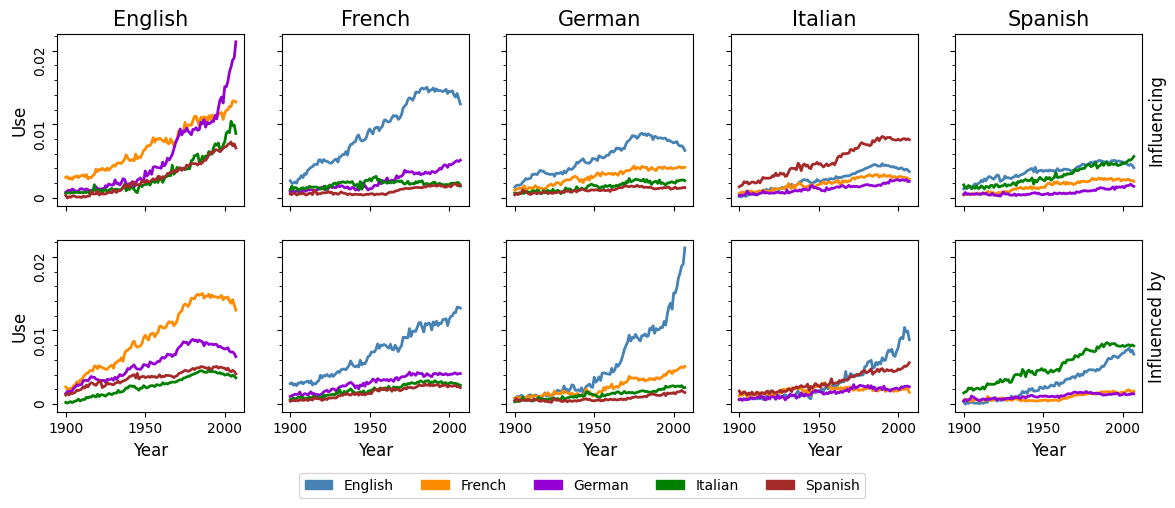

In [11]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

languages = ["english","french","german","italian","spanish"]
languagesM = ["English","French","German","Italian","Spanish"]
# exc = ["","_exc_all","_exc_none"]
colors = {"english":"steelblue","french":"darkorange","german":"darkviolet",
         "italian":"green","spanish":"brown"}
# exclude_title = ["Exclude each", "Exclude all", "Exclude none"]
ex = "_exc_all"

fig, axs = plt.subplots(2, 5, figsize=(14, 6), sharex=True,sharey=True)



for j,lan in enumerate(languages):
#         axs[i][j].
#     max0j = 0
#     max1j = 0
    for k,lan2 in enumerate(languages):
        if lan == lan2:
            continue
                
        lista0 = read_uses(lan,lan2,ex)
    
        axs[0][j].plot(range(1900,2008),lista0[50:-1],
                        color= colors[lan2],linewidth=2)
        
#         lista1 = read_uses(lan2,lan,ex)
        axs[1][k].plot(range(1900,2008),lista0[50:-1],
                        color= colors[lan],linewidth=2)
    
#         axs[0][k].ticklabel_format(axis="y",style="sci",scilimits = (0,0))  
#         axs[1][k].ticklabel_format(axis="y",style="sci",scilimits= (0,0))  

#         if max(lista0)>max0j:
#             max0j = max(lista0)
            
#         if max(lista1)>max1j:
#             max1j = max(lista1)
            
         
    axs[0][0].set_ylabel(r"Use",fontsize=12)
    axs[1][0].set_ylabel(r"Use",fontsize=12)
    
#     max0j = max0j//0.005*0.005+0.005
#     max1j = max1j//0.005*0.005+0.005
    
#     ys0 = [0,np.around(max0j,3)]
#     axs[0][j].set_yticks(ys0)
#     axs[0][j].set_yticklabels(ys0, fontsize=8)
#     axs[0][j].yaxis.set_minor_locator(AutoMinorLocator())
    axs[0][j].tick_params(axis='y', labelrotation=90)

#     ys1 = [0,np.around(max1j,3)]
#     axs[1][j].set_yticks(ys1)
#     axs[1][j].set_yticklabels(ys1, fontsize=8)
#     axs[1][j].yaxis.set_minor_locator(AutoMinorLocator())
    axs[1][j].tick_params(axis='y', labelrotation=90)
    
    axs[0][j].set_title(languagesM[j],fontsize=15)
    axs[-1][j].set_xlabel(r"Year",fontsize=12)
        
axs[0][-1].yaxis.set_label_position("right")
axs[0][-1].set_ylabel("Influencing",fontsize=12)
axs[1][-1].yaxis.set_label_position("right")
axs[1][-1].set_ylabel("Influenced by",fontsize=12)

            
import matplotlib.patches as mpatches    
brown_patch = mpatches.Patch(color='brown', label='Spanish')
green_patch = mpatches.Patch(color='green', label='Italian')
darkviolet_patch = mpatches.Patch(color='darkviolet', label='German')
darkorange_patch = mpatches.Patch(color='darkorange', label='French')
steelblue_patch = mpatches.Patch(color='steelblue', label='English')


ys00 = [0,0.01,0.02]
axs[0][0].set_yticks(ys00)
axs[0][0].set_yticklabels(ys00, fontsize=10)
axs[0][0].yaxis.set_minor_locator(AutoMinorLocator()) 


fig.subplots_adjust(bottom=0.25)
plt.legend(handles=[steelblue_patch,darkorange_patch,darkviolet_patch,green_patch,brown_patch],
    loc="upper center",
    ncol=5,
    bbox_to_anchor=(0.5, 0.16),
    bbox_transform=fig.transFigure )


# plt.savefig('Fig3_data/full15.png',bbox_inches = "tight")
plt.savefig('Fig3_data/final_image' + ex + "_same_scale_new_1800.pdf",bbox_inches = "tight")

